In [1]:
# Importing the necessary libraries
import pandas as pd

In [2]:
# Reading the Excel file and storing the data in a Pandas DataFrame
df_music = pd.read_excel('Music.xlsx')


In [3]:
# Displaying the first few rows of the DataFrame
df_music.head()

,Age,Gender,Genre
0,20,1,HIP HOP
1,24,1,HIP HOP
2,26,1,HIP HOP
3,27,1,ROCK
4,29,1,ROCK


In [4]:
# Separating the input features and output label into separate variables
X = df_music.drop('Genre', axis=1)
y = df_music['Genre']


In [5]:
# Displaying the first few rows of the input feature DataFrame
X.head()

,Age,Gender
0,20,1
1,24,1
2,26,1
3,27,1
4,29,1


In [6]:
# Displaying the first few rows of the output label DataFrame
y.head()

0    HIP HOP
1    HIP HOP
2    HIP HOP
3       ROCK
4       ROCK
Name: Genre, dtype: object

In [7]:
# Creating a Decision Tree classifier object with the 'entropy' criterion
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [8]:
# Training the model on the input feature and output label data
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [9]:
# Predicting the genre for two sets of input data and storing the predictions in the 'prediction' variable
prediction = model.predict([[23, 1], [31, 0]])

C:\Users\bappo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
# Displaying the predictions
prediction

array(['HIP HOP', 'CLASSICAL'], dtype=object)

In [11]:
# Splitting the data into training and testing sets using the 'train_test_split' function from the 'sklearn.model_selection' module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Training the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
# Predicting the output for the test set and storing the predictions in the 'prediction' variable
prediction = model.predict(X_test)

In [14]:
# Displaying the predictions
prediction

array(['POPULAR', 'CLASSICAL', 'CLASSICAL', 'CLASSICAL', 'CLASSICAL',
       'CLASSICAL'], dtype=object)

In [15]:
y_test

22      POPULAR
26    CLASSICAL
25    CLASSICAL
11    CLASSICAL
9     CLASSICAL
13    CLASSICAL
Name: Genre, dtype: object

In [16]:
# Evaluating the accuracy of the model using the 'accuracy_score' function from the 'sklearn.metrics' module
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

1.0

In [17]:
#import the required libaries
import joblib

In [18]:
# Saving the trained model using joblib
joblib.dump(model, 'music-recommender')

['music-recommender']

In [19]:
# Loading the saved model using joblib
model = joblib.load('music-recommender')

In [20]:
# Predicting the genre for two sets of input data and storing the predictions in the 'prediction' variable
prediction=model.predict([[23,1],[31,0]])

C:\Users\bappo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [21]:
# Displaying the predictions
prediction

array(['HIP HOP', 'CLASSICAL'], dtype=object)

In [22]:
from sklearn.tree import export_graphviz

export decision tree models in a format that can be visualized using Graphviz.

The function takes several parameters:

model: The decision tree model that you want to export. 

out_file: The name of the file to which you want to write the exported graph. 

feature_names: A list of feature names to use for labeling the nodes of the decision tree. 

class_names: A list of class names to use for labeling the different classes in the decision tree. 

label: Controls how the nodes are labeled. 'all' means that all nodes are labeled, 'root' means only the root node is labeled, and None means no nodes are labeled. 

rounded: Whether to round the corners of the boxes used to represent nodes in the decision tree. 

filled: Whether to fill the boxes used to represent nodes with colors to indicate class probabilities.



In [24]:
# Creating a visualization of the decision tree using Graphviz and Pydotplus
export_graphviz(model,out_file='music-recommeder.dot',feature_names=['Age','Gender'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)


In [27]:
import pydotplus

In [28]:
decision_tree=pydotplus.graph_from_dot_file('music-recommeder.dot')

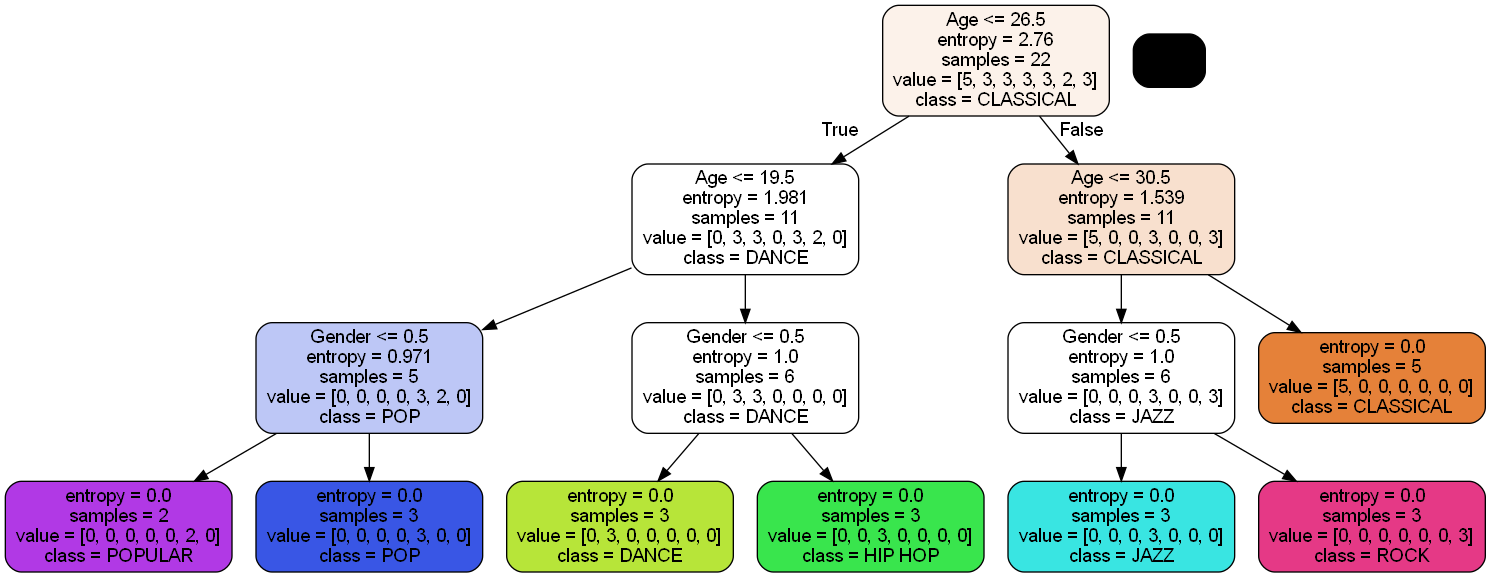

In [32]:
from IPython.display import Image
Image(decision_tree.create_png())